In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('gurugaon_prperty_missing_val1.csv')

In [4]:
df.isnull().sum()

property_type      0
society            0
sector             0
price_cr           0
price_per_sqft     0
bedRoom            0
bathroom           0
balcony            0
floorNum           0
agePossession      0
built_up_area      0
study room         0
servant room       0
store room         0
pooja room         0
others             0
furnishing_type    0
luxury_score       0
nearbyLoc_score    0
dtype: int64

In [5]:
df.shape

(3569, 19)

In [6]:
train_df=df.drop(columns=['society','price_per_sqft'])

In [7]:
train_df.head()

,property_type,sector,price_cr,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,nearbyLoc_score
0,house,sector 52,5.50,9.0,9.0,3+,3.0,Moderately Old,2700.0,0.0,1.0,0.0,1.0,1.0,2.0,26.0,53.0
1,house,sector 50,5.88,3.0,9.0,3+,3.0,Relatively New,2160.0,1.0,1.0,0.0,1.0,1.0,1.0,128.0,59.0
2,house,sector 41,7.25,9.0,8.0,3,4.0,Old Property,2475.0,0.0,1.0,0.0,0.0,0.0,2.0,94.0,69.0
3,house,sector 25,13.50,9.0,9.0,0,1.0,Relatively New,7000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,house,sector 47,5.25,9.0,9.0,3+,4.0,Relatively New,4650.0,0.0,1.0,0.0,0.0,0.0,2.0,142.0,66.0


<Axes: xlabel='luxury_score'>

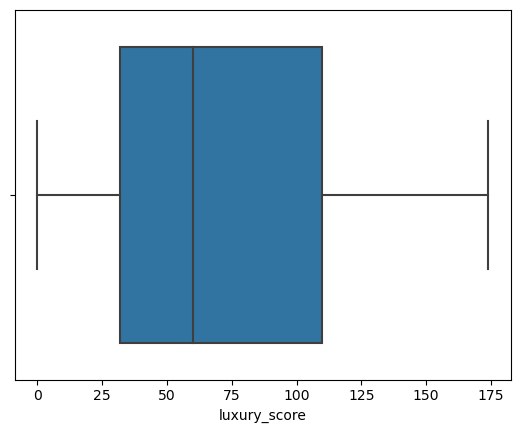

In [8]:
sns.boxplot(x=df['luxury_score'])

In [9]:
def categorize_luxury(score):
    if 0 <= score < 50:
        return "Low"
    elif 50 <= score < 150:
        return "Medium"
    elif 150 <= score <= 175:
        return "High"
    else:
        return None  # or "Undefined" or any other label for scores outside the defined bins

In [10]:
train_df['luxury_category'] = train_df['luxury_score'].apply(categorize_luxury)

In [11]:
train_df['luxury_category'].value_counts()

Low       1610
Medium    1465
High       494
Name: luxury_category, dtype: int64

<Axes: xlabel='nearbyLoc_score'>

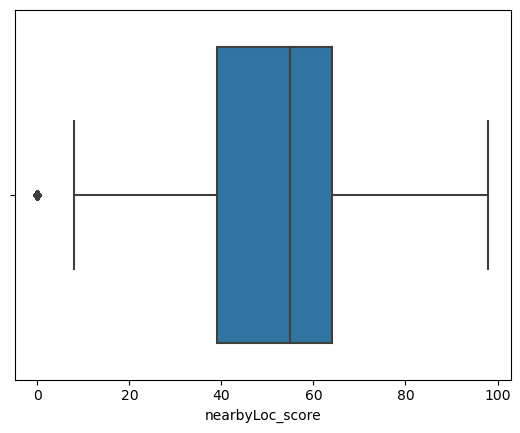

In [12]:
sns.boxplot(x=df['nearbyLoc_score'])

In [13]:
df[df['nearbyLoc_score'] == 0]

,property_type,society,sector,price_cr,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,nearbyLoc_score
3,house,independent,sector 25,13.50,19286.0,9.0,9.0,0,1.0,Relatively New,7000.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
47,house,independent,sector 24,11.00,28902.0,8.0,11.0,3+,3.0,Old Property,5000.000000,1.0,1.0,0.0,1.0,1.0,2.0,39.0,0.0
51,house,independent,sector 24,10.00,25543.0,8.0,10.0,3+,1.0,Old Property,3915.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
54,house,independent,sector 11,1.80,8078.0,8.0,5.0,2,1.0,Moderately Old,2476.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
67,house,bhim garh kheri,sector 3,1.50,7576.0,7.0,2.0,0,1.0,Moderately Old,1980.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3507,flat,hcbs sports ville,sohna road,0.24,7407.0,1.0,1.0,2,1.0,New Property,360.000000,0.0,0.0,0.0,0.0,0.0,0.0,68.0,0.0
3514,flat,hcbs sports ville,sohna road,0.22,4603.0,1.0,1.0,1,9.0,Relatively New,477.809521,0.0,0.0,0.0,0.0,0.0,2.0,44.0,0.0
3517,flat,hcbs sports ville,sohna road,0.22,3142.0,1.0,1.0,1,1.0,New Property,778.000000,0.0,0.0,0.0,0.0,0.0,0.0,86.0,0.0
3541,house,independent,sector 108,1.34,5000.0,1.0,1.0,0,1.0,Relatively New,2680.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
def categorize_nearbyLoc(score):
    if 0 <= score < 33:
        return "Low"
    elif 33 <= score < 50:
        return "Medium"
    elif 50 <= score <= 100:
        return "High"
    else:
        return None  # or "Undefined" or any other label for scores outside the defined bins

In [15]:
train_df['nearbyLoc_category'] = train_df['nearbyLoc_score'].apply(categorize_nearbyLoc)

In [16]:
train_df['nearbyLoc_category'].value_counts()

High      2190
Low        737
Medium     642
Name: nearbyLoc_category, dtype: int64

<Axes: xlabel='floorNum'>

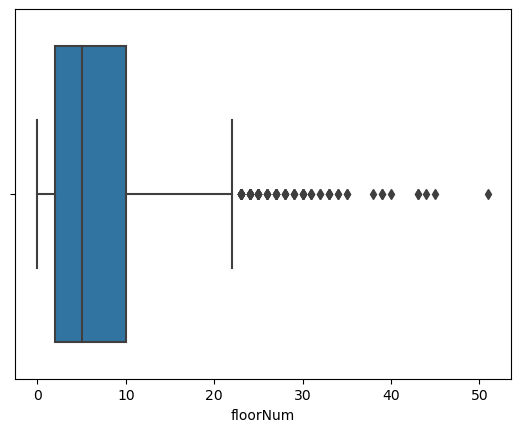

In [17]:
sns.boxplot(x=df['floorNum'])

In [18]:
def categorize_floor(floor):
    if 0 <= floor <= 2:
        return "Low Floor"
    elif 3 <= floor <= 10:
        return "Mid Floor"
    elif 11 <= floor <= 51:
        return "High Floor"
    else:
        return None  # or "Undefined" or any other label for floors outside the defined bins

In [19]:
train_df['floor_category'] = train_df['floorNum'].apply(categorize_floor)

In [20]:
train_df.drop(columns=['floorNum','luxury_score','nearbyLoc_score'],inplace=True)

In [21]:
train_df.head()

,property_type,sector,price_cr,bedRoom,bathroom,balcony,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_category,nearbyLoc_category,floor_category
0,house,sector 52,5.50,9.0,9.0,3+,Moderately Old,2700.0,0.0,1.0,0.0,1.0,1.0,2.0,Low,High,Mid Floor
1,house,sector 50,5.88,3.0,9.0,3+,Relatively New,2160.0,1.0,1.0,0.0,1.0,1.0,1.0,Medium,High,Mid Floor
2,house,sector 41,7.25,9.0,8.0,3,Old Property,2475.0,0.0,1.0,0.0,0.0,0.0,2.0,Medium,High,Mid Floor
3,house,sector 25,13.50,9.0,9.0,0,Relatively New,7000.0,0.0,0.0,0.0,0.0,0.0,0.0,Low,Low,Low Floor
4,house,sector 47,5.25,9.0,9.0,3+,Relatively New,4650.0,0.0,1.0,0.0,0.0,0.0,2.0,Medium,High,Mid Floor


In [22]:
train_df.shape

(3569, 17)

- categorical_col : property_type, sector, agePossession, luxury_category, nearbyLoc_category , floor_category
- numerical_col : bedroom, bathroom, balcony, built_up_area, study_room, servant_room, store_room, pooja_room, others, furnishing_type, 

In [23]:
# we have to convert categorical col to numerical data
from sklearn.preprocessing import OrdinalEncoder

data_label_encoded = train_df.copy()

categorical_col = train_df.select_dtypes(include='object').columns

#apply encoding for categorical column
for col in categorical_col:
    oe=OrdinalEncoder()
    data_label_encoded[col]= oe.fit_transform(data_label_encoded[[col]])
    print(oe.categories_)

# Splitting the dataset into training and testing sets
X_label = data_label_encoded.drop('price_cr', axis=1)
y_label = data_label_encoded['price_cr']

[array(['flat', 'house'], dtype=object)]
[array(['sector 1', 'sector 102', 'sector 103', 'sector 104', 'sector 105',
       'sector 106', 'sector 107', 'sector 108', 'sector 109',
       'sector 10a', 'sector 11', 'sector 110', 'sector 111',
       'sector 112', 'sector 113', 'sector 12', 'sector 13', 'sector 14',
       'sector 15', 'sector 17', 'sector 2', 'sector 21', 'sector 22',
       'sector 23', 'sector 24', 'sector 25', 'sector 26', 'sector 27',
       'sector 28', 'sector 3', 'sector 30', 'sector 31', 'sector 32',
       'sector 33', 'sector 36', 'sector 36a', 'sector 37', 'sector 37c',
       'sector 37d', 'sector 38', 'sector 39', 'sector 4', 'sector 40',
       'sector 41', 'sector 42', 'sector 43', 'sector 45', 'sector 46',
       'sector 47', 'sector 48', 'sector 49', 'sector 5', 'sector 50',
       'sector 51', 'sector 52', 'sector 53', 'sector 54', 'sector 55',
       'sector 56', 'sector 57', 'sector 58', 'sector 59', 'sector 6',
       'sector 60', 'sector 61', 'sect

In [24]:
X_label

,property_type,sector,bedRoom,bathroom,balcony,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_category,nearbyLoc_category,floor_category
0,1.0,54.0,9.0,9.0,4.0,0.0,2700.0,0.0,1.0,0.0,1.0,1.0,2.0,1.0,0.0,2.0
1,1.0,52.0,3.0,9.0,4.0,3.0,2160.0,1.0,1.0,0.0,1.0,1.0,1.0,2.0,0.0,2.0
2,1.0,43.0,9.0,8.0,3.0,2.0,2475.0,0.0,1.0,0.0,0.0,0.0,2.0,2.0,0.0,2.0
3,1.0,25.0,9.0,9.0,0.0,3.0,7000.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
4,1.0,48.0,9.0,9.0,4.0,3.0,4650.0,0.0,1.0,0.0,0.0,0.0,2.0,2.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3564,0.0,106.0,1.0,1.0,1.0,1.0,443.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,2.0
3565,1.0,29.0,1.0,1.0,1.0,3.0,480.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3566,1.0,17.0,1.0,1.0,0.0,2.0,2250.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3567,1.0,41.0,1.0,1.0,0.0,0.0,450.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [25]:
y_label

0        5.50
1        5.88
2        7.25
3       13.50
4        5.25
        ...  
3564     0.28
3565     0.37
3566     4.60
3567     0.40
3568     1.70
Name: price_cr, Length: 3569, dtype: float64

## technique 1: correlation analysis

<Axes: >

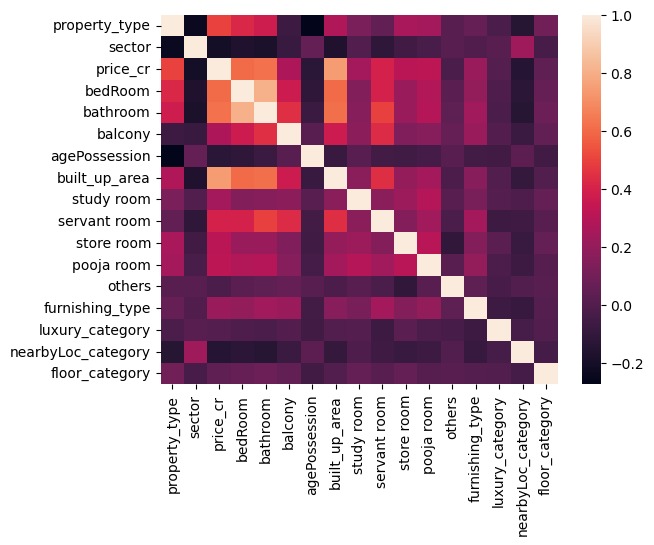

In [26]:
sns.heatmap(data_label_encoded.corr())

In [39]:
fi_df1=data_label_encoded.corr()['price_cr'].iloc[1:].to_frame().reset_index().rename(columns={'index':'feature','price_cr': 'corr_coef'})
fi_df1

,feature,corr_coef
0,sector,-0.206623
1,price_cr,1.000000
2,bedRoom,0.605453
3,bathroom,0.618743
4,balcony,0.271239
5,agePossession,-0.132982
6,built_up_area,0.742497
7,study room,0.243730
8,servant room,0.396030
9,store room,0.313333


## Technique 2 - Random Forest Feature Importance

In [28]:
from sklearn.ensemble import RandomForestRegressor

#let's train random forest regressor to calculate feature importance

rf_label=RandomForestRegressor(n_estimators=100,random_state=42)
rf_label.fit(X_label,y_label)

#let's extract featue importances score for label encoded data
fi_df2= pd.DataFrame({
    'feature': X_label.columns,
    'rf_importance' : rf_label.feature_importances_
}).sort_values(by='rf_importance',ascending=False)

fi_df2


,feature,rf_importance
6,built_up_area,0.631135
0,property_type,0.119855
1,sector,0.104488
3,bathroom,0.025984
2,bedRoom,0.022871
8,servant room,0.017798
5,agePossession,0.015091
4,balcony,0.012398
13,luxury_category,0.009274
7,study room,0.008386


## Technique 3 - Gradient Boosting Feature importances

In [29]:
from sklearn.ensemble import GradientBoostingRegressor

#train gradient boosting regressor for feature importance
gb_label=GradientBoostingRegressor()
gb_label.fit(X_label,y_label)


#let's extract featue importances score for label encoded data
fi_df3= pd.DataFrame({
    'feature': X_label.columns,
    'gb_importance' : gb_label.feature_importances_
}).sort_values(by='gb_importance',ascending=False)

fi_df3

,feature,gb_importance
6,built_up_area,0.664706
0,property_type,0.109788
1,sector,0.103378
2,bedRoom,0.035426
3,bathroom,0.035275
8,servant room,0.019302
9,store room,0.007277
5,agePossession,0.006753
14,nearbyLoc_category,0.005705
13,luxury_category,0.004953


-tree based model doesn't really care about the magnitude of data i.e. 1,2,3 thats why we can use ordinal encoding here rather than one hot encoding. but linear model will get affected

## Technique 4 - Permutation Importance

In [30]:
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split

X_train_label,X_test_label,y_train_label,y_test_label=train_test_split(X_label,y_label,test_size=0.2,random_state=42)

#train a random forest regressor in labeled data
rf_label=RandomForestRegressor(n_estimators=100,random_state=42)
rf_label.fit(X_train_label,y_train_label)

#calculate permutation importances
perm_importance=permutation_importance(rf_label,X_test_label,y_test_label,n_repeats=30,random_state=42)

#organize the result
fi_df4= pd.DataFrame({
    'feature': X_label.columns,
    'permutation_importance' : perm_importance.importances_mean
}).sort_values(by='permutation_importance',ascending=False)

fi_df4

,feature,permutation_importance
6,built_up_area,0.648335
0,property_type,0.192981
1,sector,0.125077
8,servant room,0.022316
2,bedRoom,0.020552
3,bathroom,0.018192
4,balcony,0.006482
14,nearbyLoc_category,0.005780
7,study room,0.004053
9,store room,0.003298


## Technique 5 - LASSO

In [31]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_label)

# Train a LASSO regression model
# We'll use a relatively small value for alpha (the regularization strength) for demonstration purposes
lasso = Lasso(alpha=0.01, random_state=42)
lasso.fit(X_scaled, y_label)

# Extract coefficients
fi_df5 = pd.DataFrame({
    'feature': X_label.columns,
    'lasso_coeff': lasso.coef_
}).sort_values(by='lasso_coeff', ascending=False)

fi_df5

,feature,lasso_coeff
6,built_up_area,1.435309
0,property_type,0.694179
3,bathroom,0.282512
9,store room,0.193693
7,study room,0.178288
8,servant room,0.140094
12,furnishing_type,0.133193
2,bedRoom,0.087005
10,pooja room,0.062476
13,luxury_category,0.051288


## Technique 6 - RFE

In [50]:
# one of the most reliable tecvhnique

from sklearn.feature_selection import RFE

#initialize base model
estimator=RandomForestRegressor()

#apply rfe on the label encoded and standardized training data
selector_label=RFE(estimator,n_features_to_select=X_label.shape[1],step=1)
selector_label=selector_label.fit(X_label, y_label)

#get the selected fetures based on RFE
selected_features= X_label.columns[selector_label.support_]


# Extract the coefficients for the selected features from the underlying linear regression model
selected_coefficients = selector_label.estimator_.feature_importances_

# Organize the results into a DataFrame
fi_df6 = pd.DataFrame({
    'feature': selected_features,
    'rfe_score': selected_coefficients
}).sort_values(by='rfe_score', ascending=False)

fi_df6

,feature,rfe_score
6,built_up_area,0.632806
0,property_type,0.116020
1,sector,0.105285
3,bathroom,0.026230
2,bedRoom,0.023864
8,servant room,0.018666
5,agePossession,0.014470
4,balcony,0.012138
13,luxury_category,0.009562
14,nearbyLoc_category,0.008998


## Technique 7 - Linear Regression Weights

In [42]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(X_scaled,y_label)

#extract coefficient
fi_df7=pd.DataFrame({
    'feature': X_label.columns,
    'reg_coeffs': lin_reg.coef_
}).sort_values(by='reg_coeffs',ascending=False)

fi_df7

,feature,reg_coeffs
6,built_up_area,1.438821
0,property_type,0.695508
3,bathroom,0.286967
9,store room,0.197383
7,study room,0.185904
8,servant room,0.150141
12,furnishing_type,0.142599
2,bedRoom,0.090416
10,pooja room,0.065229
13,luxury_category,0.062819


## Technique 8 - SHAP


In [34]:
!pip install shap

In [35]:
import shap

# Compute SHAP values using the trained Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_label, y_label)

explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_label)

# Summing the absolute SHAP values across all samples to get an overall measure of feature importance
shap_sum = np.abs(shap_values).mean(axis=0)

shap_values

array([[ 1.24315531e+00,  1.55713609e-01, -5.77803971e-02, ...,
        -4.66438160e-02, -5.22768932e-03, -6.86765045e-02],
       [ 2.07475655e+00,  3.43241496e-01, -8.62075749e-02, ...,
         6.48955946e-02,  1.08946128e-02, -6.53481557e-03],
       [ 1.63647855e+00,  4.91205574e-01,  1.26845375e-01, ...,
         6.84407110e-02,  3.07056302e-02, -1.16055264e-02],
       ...,
       [ 1.19840413e+00,  1.35348296e-02, -9.22339587e-03, ...,
        -4.28506819e-02,  7.45646352e-02, -5.95229878e-02],
       [ 5.21555867e-01,  1.12299428e-01, -5.91263366e-02, ...,
        -1.18088137e-02,  8.37999929e-03, -2.14324656e-02],
       [-1.91567182e-01, -1.21751000e-02,  6.03636594e-02, ...,
        -6.68598047e-03, -5.98661636e-02,  2.25666736e-04]])

In [36]:
fi_df8 = pd.DataFrame({
    'feature': X_label.columns,
    'SHAP_score': np.abs(shap_values).mean(axis=0)
}).sort_values(by='SHAP_score', ascending=False)

fi_df8

,feature,SHAP_score
6,built_up_area,1.225853
0,property_type,0.498860
1,sector,0.381548
3,bathroom,0.100493
8,servant room,0.080662
2,bedRoom,0.052249
14,nearbyLoc_category,0.040653
4,balcony,0.039930
5,agePossession,0.025752
12,furnishing_type,0.022258


In [52]:
final_fi_df = fi_df1.merge(fi_df2,on='feature').merge(fi_df3,on='feature').merge(fi_df4,on='feature').merge(fi_df5,on='feature').merge(fi_df6,on='feature').merge(fi_df7,on='feature').merge(fi_df8,on='feature').set_index('feature')

In [53]:
final_fi_df

,corr_coef,rf_importance,gb_importance,permutation_importance,lasso_coeff,rfe_score,reg_coeffs,SHAP_score
feature,,,,,,,,
sector,-0.206623,0.104488,0.103378,0.125077,-0.047852,0.105285,-0.055152,0.381548
bedRoom,0.605453,0.022871,0.035426,0.020552,0.087005,0.023864,0.090416,0.052249
bathroom,0.618743,0.025984,0.035275,0.018192,0.282512,0.026230,0.286967,0.100493
balcony,0.271239,0.012398,0.002482,0.006482,-0.046029,0.012138,-0.069548,0.039930
agePossession,-0.132982,0.015091,0.006753,-0.000685,0.000000,0.014470,0.009083,0.025752
built_up_area,0.742497,0.631135,0.664706,0.648335,1.435309,0.632806,1.438821,1.225853
study room,0.243730,0.008386,0.003765,0.004053,0.178288,0.006459,0.185904,0.016586
servant room,0.396030,0.017798,0.019302,0.022316,0.140094,0.018666,0.150141,0.080662
store room,0.313333,0.004871,0.007277,0.003298,0.193693,0.006673,0.197383,0.013693


In [54]:
# normalize the score
final_fi_df = final_fi_df.divide(final_fi_df.sum(axis=0), axis=1)

In [55]:
final_fi_df[['rf_importance','gb_importance','permutation_importance','rfe_score','SHAP_score']].mean(axis=1).sort_values(ascending=False)

feature
built_up_area         0.707189
sector                0.137246
bathroom              0.033811
bedRoom               0.028458
servant room          0.025686
balcony               0.011528
agePossession         0.010567
nearbyLoc_category    0.010513
luxury_category       0.007171
study room            0.006778
store room            0.006358
furnishing_type       0.005480
floor_category        0.004667
pooja room            0.002876
others                0.001671
dtype: float64

In [56]:
# to drop pooja room, others
X_label

,property_type,sector,bedRoom,bathroom,balcony,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_category,nearbyLoc_category,floor_category
0,1.0,54.0,9.0,9.0,4.0,0.0,2700.0,0.0,1.0,0.0,1.0,1.0,2.0,1.0,0.0,2.0
1,1.0,52.0,3.0,9.0,4.0,3.0,2160.0,1.0,1.0,0.0,1.0,1.0,1.0,2.0,0.0,2.0
2,1.0,43.0,9.0,8.0,3.0,2.0,2475.0,0.0,1.0,0.0,0.0,0.0,2.0,2.0,0.0,2.0
3,1.0,25.0,9.0,9.0,0.0,3.0,7000.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
4,1.0,48.0,9.0,9.0,4.0,3.0,4650.0,0.0,1.0,0.0,0.0,0.0,2.0,2.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3564,0.0,106.0,1.0,1.0,1.0,1.0,443.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,2.0
3565,1.0,29.0,1.0,1.0,1.0,3.0,480.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3566,1.0,17.0,1.0,1.0,0.0,2.0,2250.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3567,1.0,41.0,1.0,1.0,0.0,0.0,450.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [63]:
# with all the cols
from sklearn.model_selection import cross_val_score

rf = RandomForestRegressor(n_estimators=80, random_state=42)

scores = cross_val_score(rf, X_label, y_label, cv=15, scoring='r2')

In [64]:
scores.mean()

0.6755090171015109

In [74]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)

scores1 = cross_val_score(rf, X_label.drop(columns=['nearbyLoc_category']), y_label, cv=15, scoring='r2')

In [75]:
scores1.mean()

0.6715703289116575

In [76]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)

scores2 = cross_val_score(rf, X_label.drop(columns=['pooja room','floor_category', 'others','nearbyLoc_category']), y_label, cv=15, scoring='r2')

In [77]:
scores2.mean()

0.6706753206629331

In [78]:
export_df = X_label.drop(columns=['pooja room', 'others'])
export_df['price_cr'] = y_label

In [79]:
export_df.to_csv('gurgaon_properties_post_feature_selection.csv', index=False)

In [80]:
export_df

,property_type,sector,bedRoom,bathroom,balcony,agePossession,built_up_area,study room,servant room,store room,furnishing_type,luxury_category,nearbyLoc_category,floor_category,price_cr
0,1.0,54.0,9.0,9.0,4.0,0.0,2700.0,0.0,1.0,0.0,2.0,1.0,0.0,2.0,5.50
1,1.0,52.0,3.0,9.0,4.0,3.0,2160.0,1.0,1.0,0.0,1.0,2.0,0.0,2.0,5.88
2,1.0,43.0,9.0,8.0,3.0,2.0,2475.0,0.0,1.0,0.0,2.0,2.0,0.0,2.0,7.25
3,1.0,25.0,9.0,9.0,0.0,3.0,7000.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,13.50
4,1.0,48.0,9.0,9.0,4.0,3.0,4650.0,0.0,1.0,0.0,2.0,2.0,0.0,2.0,5.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3564,0.0,106.0,1.0,1.0,1.0,1.0,443.0,0.0,0.0,0.0,1.0,1.0,0.0,2.0,0.28
3565,1.0,29.0,1.0,1.0,1.0,3.0,480.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.37
3566,1.0,17.0,1.0,1.0,0.0,2.0,2250.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,4.60
3567,1.0,41.0,1.0,1.0,0.0,0.0,450.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.40
